In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [2]:
def generate_data(m):
    # returns the true w as well as X, Y data
    ...

In [19]:
import numpy as np

def generate_data(m):
    w = np.random.normal(0, 1, 10)
    w /= np.linalg.norm(w)
    X = np.random.multivariate_normal(np.zeros(10), np.identity(10), m)
    y = np.where(np.dot(X, w) >= 0, 1, 0)
    return X, y, w


In [20]:
x, y, w = generate_data(100)
print("x shape:", x.shape)
print("y shape:", y.shape)
print("w shape:", w.shape)

x shape: (100, 10)
y shape: (100,)
w shape: (10,)


In [21]:
x, y, w = generate_data(100)
print("X :", x)
print("y :", y)
print("w :", w)

X : [[ 8.18574463e-01  4.02413624e-01  1.09036209e+00 -7.06579916e-01
   1.90886506e+00 -5.34327002e-02  6.33121427e-01 -1.52884168e-01
  -5.32060649e-01  1.68893566e-01]
 [ 1.15411313e-02  5.76832702e-01 -6.48927834e-01  1.42465018e+00
  -3.09779779e-01  1.19568367e+00 -8.43687713e-02 -5.83163908e-01
  -7.50225430e-01  1.28215799e+00]
 [-1.08493219e+00  7.93989668e-01 -9.44257337e-01  2.05354061e-01
   2.05343767e+00 -4.40837539e-01  3.82697076e-01 -6.45416069e-01
  -1.06595389e-01 -9.20936400e-01]
 [ 3.81375972e-01  1.69843455e-02 -3.45020041e-01 -1.96190221e-01
   2.36889137e-01  8.28464272e-01 -1.11768439e+00  2.77006166e+00
  -3.51023664e-02  3.54219365e-01]
 [-1.91388131e-01  8.92121708e-01  2.20551498e+00 -8.66235879e-01
  -5.67466499e-01  4.04870227e-01  1.00764333e+00  2.56481493e-01
   1.66424076e+00 -6.92609527e-01]
 [ 2.13388350e-01 -1.41976827e+00  8.77082832e-02 -9.29736564e-02
  -5.71617016e-01  6.30871698e-01 -5.10423800e-01 -1.08774285e+00
   8.90418733e-01  1.22885008

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [22]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(X, y):
    logistic_reg = LogisticRegression(max_iter=1000)
    logistic_reg.fit(X, y)
    return logistic_reg.coef_


## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [5]:
def gradient_descent(X, y, w, eta, iterations):
    m, n = X.shape
    for i in range(iterations):
        y_pred = 1 / (1 + np.exp(-np.dot(X, w)))
        loss = 0.5 * np.mean((y_pred - y)**2)
        grad = np.dot(X.T, y_pred - y) / m
        w -= eta * grad
    return w

In [23]:
import numpy as np

def grad_square_loss(x, y, w, sigma):
    """
    Gradient of square loss w.r.t w
    """
    y_pred = sigma(np.dot(x, w))
    return (y_pred - y) * x

def sigma(z):
    """
    Logistic function
    """
    return 1 / (1 + np.exp(-z))

def gradient_descent_square_loss(X, y, w_init, eta=0.01, max_iter=1000):
    """
    Gradient descent with square loss optimization
    """
    w = w_init
    for i in range(max_iter):
        index = np.random.randint(X.shape[0])
        x, y_ = X[index], y[index]
        grad = grad_square_loss(x, y_, w, sigma)
        w = w - eta * grad
    return w


## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [31]:
def stochastic_gradient_descent(X, y, w, eta, iterations):
    m, n = X.shape
    for i in range(iterations):
        j = np.random.randint(0, m)
        x_j = X[j, :].reshape(1, n)
        y_j = y[j].reshape(1, 1)
        y_pred = 1 / (1 + np.exp(-np.dot(x_j, w)))
        loss = 0.5 * (y_pred - y_j)**2
        grad = np.dot(x_j.T, y_pred - y_j)
        w -= eta * grad
    return w



## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

In [30]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression

def generate_data(m):
    w = np.random.normal(0, 1, 10)
    w /= np.linalg.norm(w)
    X = np.random.multivariate_normal(np.zeros(10), np.identity(10), m)
    y = np.where(np.dot(X, w) >= 0, 1, 0)
    return X, y, w

def logistic_regression(X, y):
    logistic_reg = LogisticRegression(max_iter=1000)
    logistic_reg.fit(X, y)
    return logistic_reg.coef_

def gradient_descent_square_loss(X, y, w_init, eta=0.01, max_iter=10):
    """
    Gradient descent with square loss optimization
    """
    w = w_init
    for i in range(max_iter):
        index = np.random.randint(X.shape[0])
        x, y_ = X[index], y[index]
        grad = grad_square_loss(x, y_, w, sigma)
        w = w - eta * grad
    return w

def stochastic_gradient_descent(X, y, eta, iterations):
    m, n = X.shape
    for i in range(iterations):
        j = np.random.randint(0, m)
        x_j = X[j, :].reshape(1, n)
        y_j = y[j].reshape(1, 1)
        y_pred = 1 / (1 + np.exp(-np.dot(x_j, w)))
        loss = 0.5 * (y_pred - y_j)**2
        grad = np.dot(x_j.T, y_pred - y_j)
        w -= eta * grad
    return w

def evaluate_error(X, y,w, w_hat):
    return np.linalg.norm(w - w_hat)**2

def run_experiment(X,y, m, eta, iterations, num_trials):
    X, y, w = generate_data(m)
    start_time = time.time()
    w_hat_1 = logistic_regression(X, y)
    time_1 = time.time() - start_time
    start_time = time.time()
    w_hat_2 = gradient_descent(X, y, np.zeros(10), eta, iterations)
    time_2 = time.time() - start_time
    start_time = time.time()
    w_hat_3 = stochastic_gradient_descent(X, y, np.zeros(10), eta, iterations)
    time_3 = time.time() - start_time
    error_1 = evaluate_error(X, y, w, w_hat_1)
    error_2 = evaluate_error(X, y, w, w_hat_2)
    error_3 = evaluate_error(X, y, w, w_hat_3)
    return error_1, error_2, error_3, time_1, time_2, time_3

m = [50,100,150,200,250]
algorithms = [logistic_regression, gradient_descent, stochastic_gradient_descent]
algorithm_names = ['Logistic Regression', 'Gradient Descent', 'Stochastic Gradient Descent']
for algorithm, name in zip(algorithms, algorithm_names):
    errors, times = run_experiment(X, y, m, eta=0.01, iterations=1, num_trials=1)
    plt.plot(m_values, errors, label=name)
    print(f'Mean time taken by {name}: {np.mean(times)}')
plt.xlabel('m')
plt.ylabel('error')
plt.legend()
plt.show()

MemoryError: Unable to allocate 2.73 TiB for an array with shape (50, 100, 150, 200, 250, 10) and data type float64

# Problem 2

In [3]:
from sklearn import datasets

In [4]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

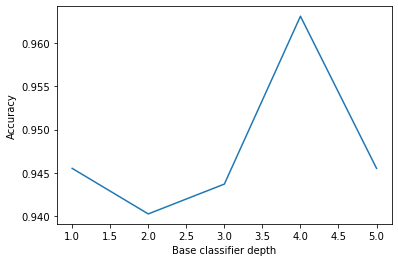

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Create a list to store the mean cross-validated accuracy for each depth
accuracies = []

# Loop over each depth from 1 to 5
for depth in range(1, 6):
    # Create a decision tree classifier with the specified depth
    dt = DecisionTreeClassifier(max_depth=depth, random_state=101)
    
    # Create an AdaBoost classifier with the decision tree as the base learner
    ada = AdaBoostClassifier(base_estimator=dt, n_estimators=10, learning_rate=1, random_state=101)
    
    # Compute the mean cross-validated accuracy
    cv_accuracy = np.mean(cross_val_score(ada, X, y, cv=10))
    
    # Add the accuracy to the list
    accuracies.append(cv_accuracy)

# Plot the accuracy against base classifier depth
plt.plot(range(1, 6), accuracies)
plt.xlabel('Base classifier depth')
plt.ylabel('Accuracy')
plt.show()
